# Exploratory Data Analysis Notebook

In [1]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score
sns.set_style('darkgrid')

In [2]:
# load in the data and drop the unneeded columns
df = pd.read_csv('../data/streamer_data.csv')
df = df.drop(columns = ['game_name', 'login', 'broadcaster_type', 'language'])
df.account_age = pd.to_timedelta(df.account_age).map(lambda x: x.days)
labels = df.columns

In [3]:
# peak at the data
df.head()

,view_count,account_age,hours_streamed,average_viewers,peak_viewers,days_of_activity,total_games_streamed,daily_broadcast_time,hours_watched_daily,followers_per_stream,views_per_stream,followers_per_hour,views_per_hour,hours_watched,followers_to_date,active_days_per_week,average_games,is_affiliate,target
0,223617671,2271,12329,18713,222720,1384,666,9,166694,3038,160973,342,18123,230704779,4220004,6.6,3.0,1,1
1,27590075,1330,969,1764,35156,421,25,2,4060,474,62976,213,28334,1709463,207022,2.3,1.1,1,1
2,54364251,893,2495,13559,90006,647,16,4,52287,4128,83720,1083,21978,33829930,2703816,5.1,1.1,1,1
3,37392445,983,6486,8362,226974,907,139,7,59797,851,38627,129,5860,54235792,837350,6.4,1.6,1,1
4,3973820,146,468,6703,19128,107,17,4,29341,3467,46531,644,8643,3139461,303362,5.0,1.5,0,0


In [4]:
# checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29538 entries, 0 to 29537
Data columns (total 19 columns):
view_count              29538 non-null int64
account_age             29538 non-null int64
hours_streamed          29538 non-null int64
average_viewers         29538 non-null int64
peak_viewers            29538 non-null int64
days_of_activity        29538 non-null int64
total_games_streamed    29538 non-null int64
daily_broadcast_time    29538 non-null int64
hours_watched_daily     29538 non-null int64
followers_per_stream    29538 non-null int64
views_per_stream        29538 non-null int64
followers_per_hour      29538 non-null int64
views_per_hour          29538 non-null int64
hours_watched           29538 non-null int64
followers_to_date       29538 non-null int64
active_days_per_week    29538 non-null float64
average_games           29538 non-null float64
is_affiliate            29538 non-null int64
target                  29538 non-null int64
dtypes: float64(2), int64(17)
me

In [5]:
# checking summary statistics for anomolies
df.describe()

,view_count,account_age,hours_streamed,average_viewers,peak_viewers,days_of_activity,total_games_streamed,daily_broadcast_time,hours_watched_daily,followers_per_stream,views_per_stream,followers_per_hour,views_per_hour,hours_watched,followers_to_date,active_days_per_week,average_games,is_affiliate,target
count,2.953800e+04,29538.000000,29538.000000,29538.000000,29538.000000,29538.000000,29538.000000,29538.000000,29538.000000,29538.000000,29538.000000,29538.000000,29538.000000,2.953800e+04,2.953800e+04,29538.000000,29538.000000,29538.000000,29538.000000
mean,2.204232e+05,1472.421322,715.264033,34.064866,504.156476,166.911064,23.093845,3.429684,171.114937,13.925418,331.734173,4.010698,77.543706,1.126897e+05,5.208249e+03,2.169734,1.215394,0.808078,0.052881
std,3.903278e+06,892.963284,1292.931884,323.060722,5108.301220,211.878296,36.745896,1.797540,2150.265052,92.830607,3391.788010,42.483732,641.551237,2.442343e+06,6.627432e+04,1.725585,0.283423,0.393819,0.223800
min,9.010000e+02,60.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-448.000000,0.000000,-225.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000,0.000000
25%,1.897000e+03,769.000000,99.000000,6.000000,16.000000,38.000000,6.000000,2.000000,15.000000,2.000000,33.000000,0.000000,11.000000,6.820000e+02,1.240000e+02,0.700000,1.000000,1.000000,0.000000
50%,4.496500e+03,1376.000000,261.000000,7.000000,36.000000,86.000000,12.000000,3.000000,24.000000,3.000000,51.000000,1.000000,18.000000,2.063000e+03,2.730000e+02,1.700000,1.100000,1.000000,0.000000
75%,1.548700e+04,2124.000000,749.000000,12.000000,126.000000,201.750000,26.000000,4.000000,47.000000,6.000000,96.000000,2.000000,34.000000,8.353750e+03,8.940000e+02,3.300000,1.300000,1.000000,0.000000
max,3.707985e+08,4942.000000,34335.000000,22500.000000,487430.000000,1479.000000,1481.000000,24.000000,166694.000000,4589.000000,174725.000000,5612.000000,41712.000000,2.307048e+08,5.833607e+06,7.000000,4.900000,1.000000,1.000000


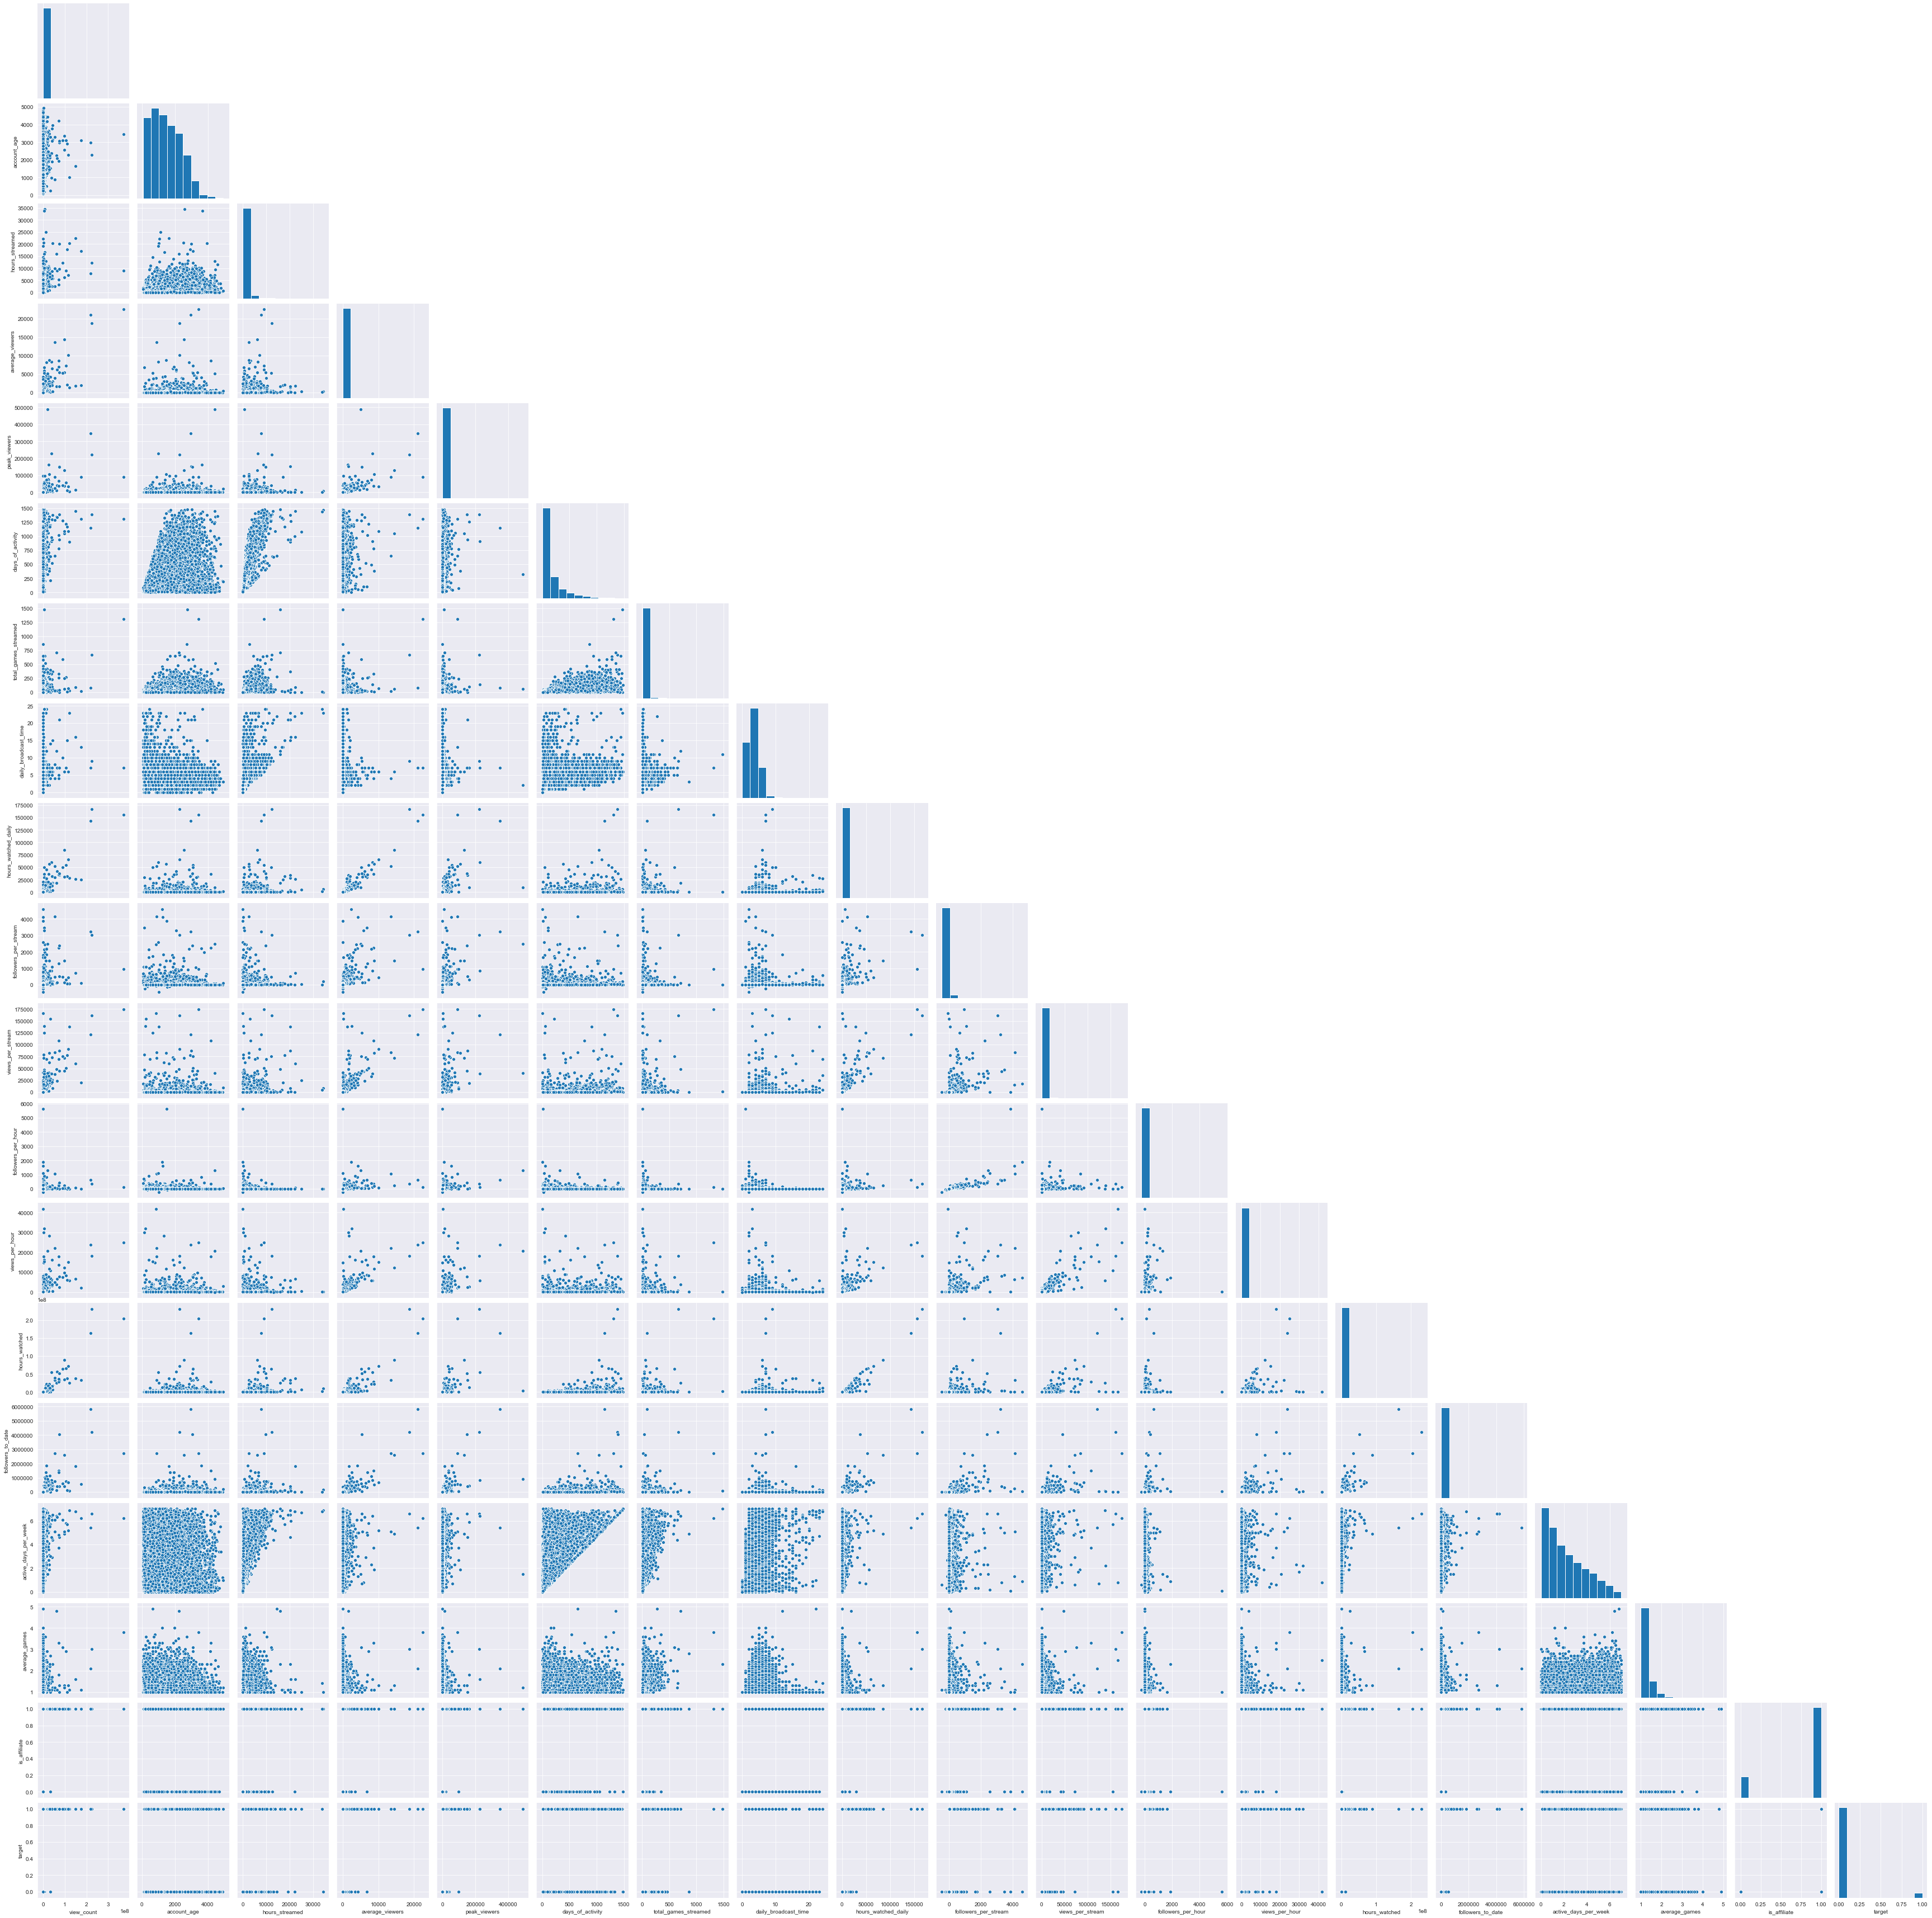

In [6]:
# checking for relationships across variables
sns.pairplot(df, corner = True);

In [17]:
# quick function for bar plot of non-partner vs partner for a given column
def bar_plot(column, title, ylabel):
    non_partner = df.loc[df.target == 0][column].mean()
    partner = df.loc[df.target == 1][column].mean()
    fig, ax = plt.subplots(figsize = (6,3))
    ax.set_title(f'{title}', fontsize = 14)
    ax.set_ylabel(f'{ylabel}', fontsize = 8)
    sns.barplot(y = [non_partner, partner], x = ['non-partner', 'partner'], color='b', alpha=0.7);
    return
# quick function for showing the distribution differences between non-partner and partners for a given column
def hist_plot(column):
    fig, ax = plt.subplots(figsize = (8,4))
    ax.set_title(f'Unpartnered vs Partnered Distribution of {column}', fontsize = 14)
    sns.distplot(df.loc[df.target == 0][column], ax = ax)
    sns.distplot(df.loc[df.target == 1][column], ax = ax)
    ax.legend(['Unpartnered', 'Partnered'])
    return fig

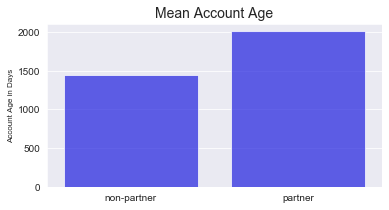

In [19]:
# looking at mean account age
bar_plot(column = 'account_age',
         title = 'Mean Account Age',
         ylabel= 'Account Age in Days')

From this we can see that on average, a partner has an older account than a non partner.

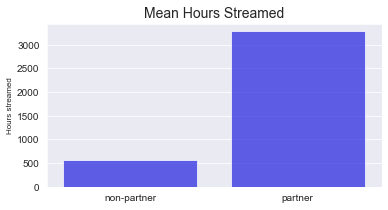

In [21]:
# looking at the hours streamed
bar_plot(column = 'hours_streamed', 
         title = 'Mean Hours Streamed', 
         ylabel = 'Hours streamed')

In this visual its clear that partners tend to stream significantly more hours in total compared to non-partners

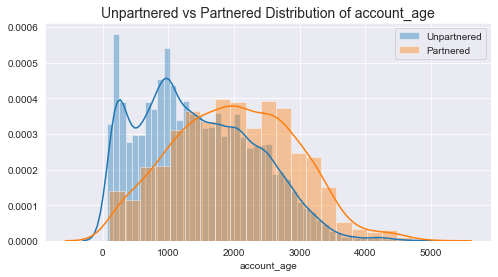

In [22]:
fig = hist_plot('account_age')
# fig.savefig('../images/account_age_distplot.png', bbox_inches='tight')

The distribution of account ages of partnered accounts tends to be older than the ages of unpartnered accounts.

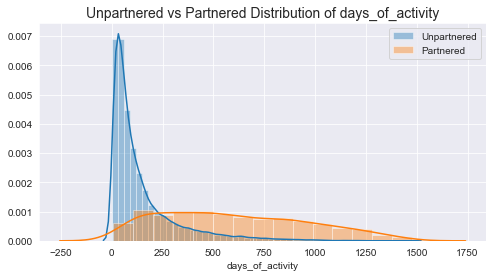

In [23]:
hist_plot('days_of_activity');
# fig.savefig('../images/days_of_activity_distplot.png', bbox_inches='tight')

The amount of activity for partnered channels is much more variable than for unpartnered channels, but the trend appears to be that partners are active for more days.

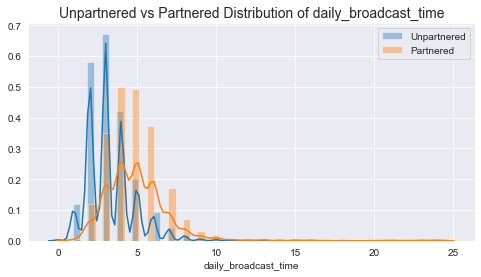

In [12]:
hist_plot('daily_broadcast_time');

The peak in daily broadcast time for unpartnered channels seems to be 3 hours, while for partnered streams the peak is 4-5 hours.  

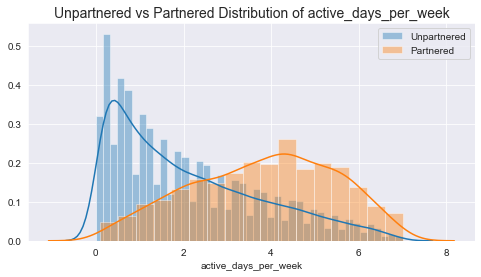

In [24]:
fig = hist_plot('active_days_per_week');
# fig.savefig('../images/active_days_per_week_distplot.png', bbox_inches='tight')

This figure shows that partnered streams are usually stream more frequently per week than unpartnered streams.  While unpartnered channels' active days per week is heavily right skewed, the partnered channels are heavily left skewed.

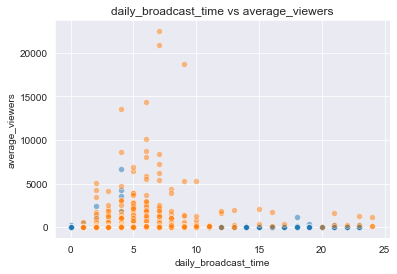

In [25]:
def scatter_fig(var1, var2):    
    fig, ax = plt.subplots()
    ax.set_title(f'{var1} vs {var2}')
    sns.scatterplot(df.loc[df.target == 0][var1], df.loc[df.target == 0][var2], alpha=0.5);
    sns.scatterplot(df.loc[df.target == 1][var1], df.loc[df.target == 1][var2], alpha=0.5);
    return fig
fig = scatter_fig('daily_broadcast_time', 'average_viewers');
# fig.savefig('../images/daily_broadcast_time_vs_average_viewers_scatterplot.png', bbox_inches='tight')

This figure shows the number of average views per hours per day streamed.  The highest amount of average viewers seems to be for channels that average around 5 hours of daily broadcast time.

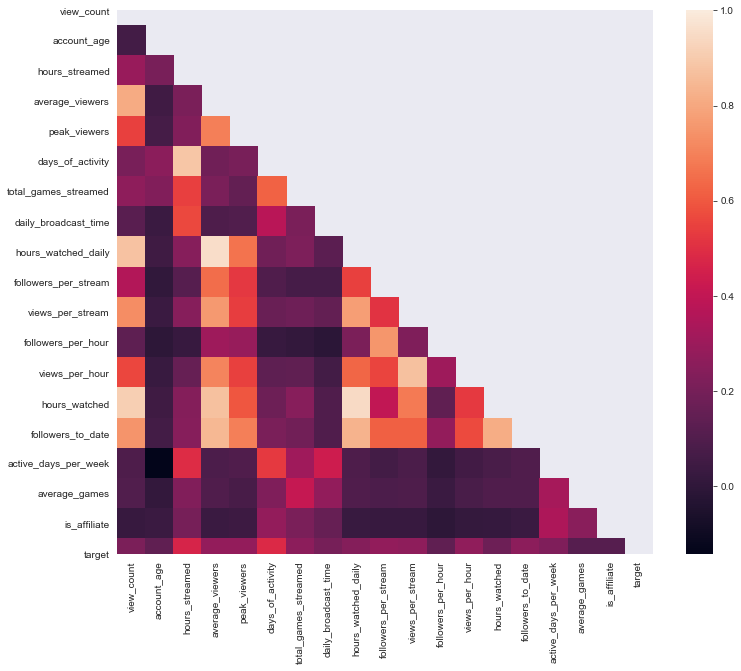

In [15]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(corr, mask = mask)

This figure shows the correlation between each of the features in the dataset.